# TWITTER SENTIMENTAL ANALYSIS 

Data source - https://www.kaggle.com/arathee2/demonetization-in-india-twitter-data

Steps:

1. Import libraries and data
2. Data Cleansing
3. Labeling each tweet as either positive review or negative.
4. Plotting sentiment graph
5. Wordcloud of sentiment

# 1. Importing libraries and dataset

In [10]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as py
from wordcloud import WordCloud, STOPWORDS


In [6]:
tweets = pd.read_csv('demonetization-tweets.csv', encoding = 'ISO-8859-1')
tweets.head(10)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False
5,6,6,@DerekScissors1: Indias #demonetization: #Bla...,False,0,DerekScissors1,2016-11-23 18:39:11,False,NaN,8.014953e+17,2.586266e+09,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",ambazaarmag,0,False,False
6,7,7,RT @gauravcsawant: Rs 40 lakh looted from a ba...,False,0,NaN,2016-11-23 18:38:53,False,NaN,8.014952e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",bhodia1,637,True,False
7,8,8,RT @Joydeep_911: Calling all Nationalists to j...,False,0,NaN,2016-11-23 18:38:20,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",KARUNASHANKEROJ,112,True,False
8,9,9,RT @sumitbhati2002: Many opposition leaders ar...,False,0,NaN,2016-11-23 18:38:09,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",sumitbhati2002,1,True,False
9,10,10,National reform now destroyed even the essence...,False,0,NaN,2016-11-23 18:38:00,True,NaN,8.014950e+17,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",HelpIndia2016,0,False,False


# 2. Cleaning Data

1. Using BeautifulSoup to remove HTML
2. Removing non-letters and will splitting the sentences into words
3. Removal of Stopwords

In [7]:
tweets.columns


Index(['Unnamed: 0', 'X', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted'],
      dtype='object')

a. Removing usernames

In [8]:
def remove_pattern(inputtext, pattern):
    r = re.findall(pattern, inputtext)
    for i in r:
        inputtext = re.sub(i, '', inputtext)
    return inputtext   


numpy.vectorize
class numpy.vectorize(pyfunc, otypes=None, doc=None, excluded=None, cache=False, signature=None)
Generalized function class.

Define a vectorized function which takes a nested sequence of objects or numpy arrays as inputs and returns a single numpy array or a tuple of numpy arrays. The vectorized function evaluates pyfunc over successive tuples of the input arrays like the python map function, except it uses the broadcasting rules of numpy.



In [11]:
tweets['text'] = np.vectorize(remove_pattern)(tweets['text'], "@[\w]*")
tweets.head(10)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT : Critical question: Was PayTM informed abo...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT : Did you vote on #Demonetization on Modi s...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT : Former FinSec, RBI Dy Governor, CBDT Chai...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT : Gurugram (Haryana): Post office employees...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT : Reddy Wedding! cartoon #demonetization #...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False
5,6,6,: Indias #demonetization: #Blackmoney a sympt...,False,0,DerekScissors1,2016-11-23 18:39:11,False,NaN,8.014953e+17,2.586266e+09,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",ambazaarmag,0,False,False
6,7,7,RT : Rs 40 lakh looted from a bank in Kishtwar...,False,0,NaN,2016-11-23 18:38:53,False,NaN,8.014952e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",bhodia1,637,True,False
7,8,8,RT : Calling all Nationalists to join...\r\nWa...,False,0,NaN,2016-11-23 18:38:20,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",KARUNASHANKEROJ,112,True,False
8,9,9,RT : Many opposition leaders are with on the ...,False,0,NaN,2016-11-23 18:38:09,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",sumitbhati2002,1,True,False
9,10,10,National reform now destroyed even the essence...,False,0,NaN,2016-11-23 18:38:00,True,NaN,8.014950e+17,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",HelpIndia2016,0,False,False


b. Changing text to lowercase and removing non letters and stopwords

In [12]:
def remove(x):
    #removing html
    x = BeautifulSoup(x).get_text()
    #remvoving non letters
    x =re.sub('[^a-zA-Z]',' ',x)
    #converting to lowercase and splitting
    x=x.lower().split()
    #removing stopwords
    stop = set(stopwords.words('english'))
    words = [w for w in x if not w in stop]
    #joining all relevant words back into a string
    return(' '.join(words))
   


In [13]:
tweets['text'] = tweets['text'].apply(lambda x:remove(x))



In [14]:
tweets['text'] = tweets['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) 
#removing letter having length less than 3


c Tokenization and Stemming


In [16]:
tokenizedtweets = tweets['text'].apply(lambda x: x.split())
tokenizedtweets.head(10)

0    [critical, question, paytm, informed, demoneti...
1                 [vote, demonetization, modi, survey]
2    [former, finsec, governor, cbdt, chair, harvar...
3    [gurugram, haryana, post, office, employees, p...
4    [reddy, wedding, cartoon, demonetization, redd...
5    [india, demonetization, blackmoney, symptom, d...
6    [lakh, looted, bank, kishtwar, third, incident...
7    [calling, nationalists, join, walk, corruption...
8    [many, opposition, leaders, demonetization, re...
9    [national, reform, destroyed, even, essence, s...
Name: text, dtype: object

Stemming :
The reason why we stem is to shorten the lookup, and normalize sentences.

Consider:

I was taking a ride in the car.
I was riding in the car.
This sentence means the same thing. in the car is the same. I was is the same. the ing denotes a clear past-tense in both cases, so is it truly necessary to differentiate between ride and riding, in the case of just trying to figure out the meaning of what this past-tense activity was?
No, not really.
This is just one minor example, but imagine every word in the English language, every possible tense and affix you can put on a word. Having individual dictionary entries per version would be highly redundant and inefficient, especially since, once we convert to numbers, the "value" is going to be identical.
One of the most popular stemming algorithms is the Porter stemmer, which has been around since 1979.

Stemming words with NLTK
Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.
Errors in Stemming:
There are mainly two errors in stemming – Overstemming and Understemming. Overstemming occurs when two words are stemmed to same root that are of different stems. Under-stemming occurs when two words are stemmed to same root that are not of different stems.

Applications of stemming are:
Stemming is used in information retrieval systems like search engines.
It is used to determine domain vocabularies in domain analysis.
Stemming is desirable as it may reduce redundancy as most of the time the word stem and their inflected/derived words mean the same.

In [17]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenizedtweets = tokenizedtweets.apply(lambda x: [stemmer.stem(i) for i in x])
tokenizedtweets.head(10)


0    [critic, question, paytm, inform, demonet, edi...
1                        [vote, demonet, modi, survey]
2    [former, finsec, governor, cbdt, chair, harvar...
3    [gurugram, haryana, post, offic, employe, prov...
4    [reddi, wed, cartoon, demonet, reddywed, http,...
5    [india, demonet, blackmoney, symptom, diseas, ...
6    [lakh, loot, bank, kishtwar, third, incid, sin...
7    [call, nationalist, join, walk, corruptionfree...
8    [mani, opposit, leader, demonet, respect, deci...
9    [nation, reform, destroy, even, essenc, sagan,...
Name: text, dtype: object

In [18]:
for i in range(len(tokenizedtweets)):
    tokenizedtweets[i] = ' '.join(tokenizedtweets[i])
    tweets['text'] = tokenizedtweets
tweets.head(10)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,critic question paytm inform demonet edict cle...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,vote demonet modi survey,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,former finsec governor cbdt chair harvard prof...,False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,gurugram haryana post offic employe provid cas...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,reddi wed cartoon demonet reddywed http glnrq,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False
5,6,6,india demonet blackmoney symptom diseas http,False,0,DerekScissors1,2016-11-23 18:39:11,False,NaN,8.014953e+17,2.586266e+09,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",ambazaarmag,0,False,False
6,7,7,lakh loot bank kishtwar third incid sinc demon...,False,0,NaN,2016-11-23 18:38:53,False,NaN,8.014952e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",bhodia1,637,True,False
7,8,8,call nationalist join walk corruptionfreeindia...,False,0,NaN,2016-11-23 18:38:20,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",KARUNASHANKEROJ,112,True,False
8,9,9,mani opposit leader demonet respect decis supp...,False,0,NaN,2016-11-23 18:38:09,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",sumitbhati2002,1,True,False
9,10,10,nation reform destroy even essenc sagan instan...,False,0,NaN,2016-11-23 18:38:00,True,NaN,8.014950e+17,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",HelpIndia2016,0,False,False


# Labelling tweets as positive or negative

In [21]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\EliteBook\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
from nltk.sentiment import vader
from nltk.sentiment.util import *
from nltk import tokenize
sentiment = vader.SentimentIntensityAnalyzer()

In [32]:

tweets['sentiment_compound_polarity']=tweets.text.apply(lambda x:sentiment.polarity_scores(x)['compound'])
tweets['sentiment_negative']=tweets.text.apply(lambda x:sentiment.polarity_scores(x)['neg'])
tweets['sentiment_positive']=tweets.text.apply(lambda x:sentiment.polarity_scores(x)['pos'])
tweets['sentiment']=''
tweets.loc[tweets.sentiment_compound_polarity>0, 'sentiment'] = 'positive'
tweets.loc[tweets.sentiment_compound_polarity==0, 'sentiment'] = 'neutral'
tweets.loc[tweets.sentiment_compound_polarity<0, 'sentiment'] = 'negative'
columns = tweets['sentiment']
tweets.head(10)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,sentiment_compound_polarity,sentiment_negative,sentiment_positive,sentiment
0,1,1,critic question paytm inform demonet edict cle...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,-0.2732,0.174,0.000,negative
1,2,2,vote demonet modi survey,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,0.0000,0.000,0.000,neutral
2,3,3,former finsec governor cbdt chair harvard prof...,False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,0.0000,0.000,0.000,neutral
3,4,4,gurugram haryana post offic employe provid cas...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,0.0000,0.000,0.000,neutral
4,5,5,reddi wed cartoon demonet reddywed http glnrq,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,0.0000,0.000,0.000,neutral
5,6,6,india demonet blackmoney symptom diseas http,False,0,DerekScissors1,2016-11-23 18:39:11,False,NaN,8.014953e+17,2.586266e+09,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",ambazaarmag,0,False,False,0.0000,0.000,0.000,neutral
6,7,7,lakh loot bank kishtwar third incid sinc demon...,False,0,NaN,2016-11-23 18:38:53,False,NaN,8.014952e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",bhodia1,637,True,False,-0.6908,0.370,0.000,negative
7,8,8,call nationalist join walk corruptionfreeindia...,False,0,NaN,2016-11-23 18:38:20,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",KARUNASHANKEROJ,112,True,False,0.6369,0.000,0.426,positive
8,9,9,mani opposit leader demonet respect decis supp...,False,0,NaN,2016-11-23 18:38:09,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",sumitbhati2002,1,True,False,0.7003,0.000,0.492,positive
9,10,10,nation reform destroy even essenc sagan instan...,False,0,NaN,2016-11-23 18:38:00,True,NaN,8.014950e+17,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",HelpIndia2016,0,False,False,-0.5423,0.212,0.000,negative


In [46]:
positive=0
negative=0
neutral=0
total=0

for item in tweets['sentiment_compound_polarity']:
    if( item > 0):
        positive=positive+1
        total= total+1
    if( item < 0):
        negative = negative+1
        total =total+1
    else:
        neutral = neutral+1
        total =total+1
        


3824

# Plotting Graph

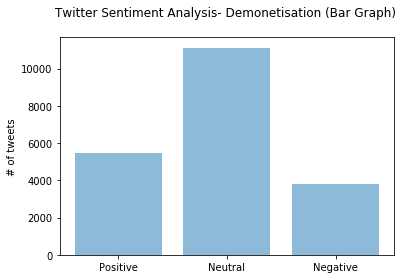

In [48]:
objects = ('Positive','Neutral','Negative')
y_pos = np.arange(len(objects))
performance = [positive,neutral,negative]

py.bar(y_pos, performance, align='center', alpha=0.5)
py.xticks(y_pos, objects)
py.ylabel('# of tweets')
py.title('Twitter Sentiment Analysis- Demonetisation (Bar Graph) \n')
py.show()


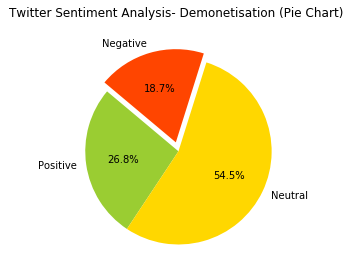

In [50]:
#Pie Graph

colors = ['yellowgreen', 'gold', 'orangered']
explode = (0, 0, 0.1)  # explode last slice

py.pie(performance, explode=explode, labels=objects, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=140)
 
py.axis('equal')
py.title('Twitter Sentiment Analysis- Demonetisation (Pie Chart) \n')
py.show()


# 4. Generating WordCloud

In [57]:

tweet_pos=tweets.loc[tweets.sentiment_compound_polarity>0,'text']
tweet_net=tweets.loc[tweets.sentiment_compound_polarity==0,'text']
tweet_neg=tweets.loc[tweets.sentiment_compound_polarity<0,'text']

In [60]:
def draw_wordcloud(data, color = 'black'):    #function to draw wordcloud
    words=' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                          if 'http' not in word
                             and word !='RT'
                          ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                         background_color=color,
                         width=2500,
                         height=2000
                         ).generate(cleaned_word)
    py.figure(1, figsize=(13, 13))
    py.imshow(wordcloud)
    py.axis('off')
    py.show()

Positive words cloud


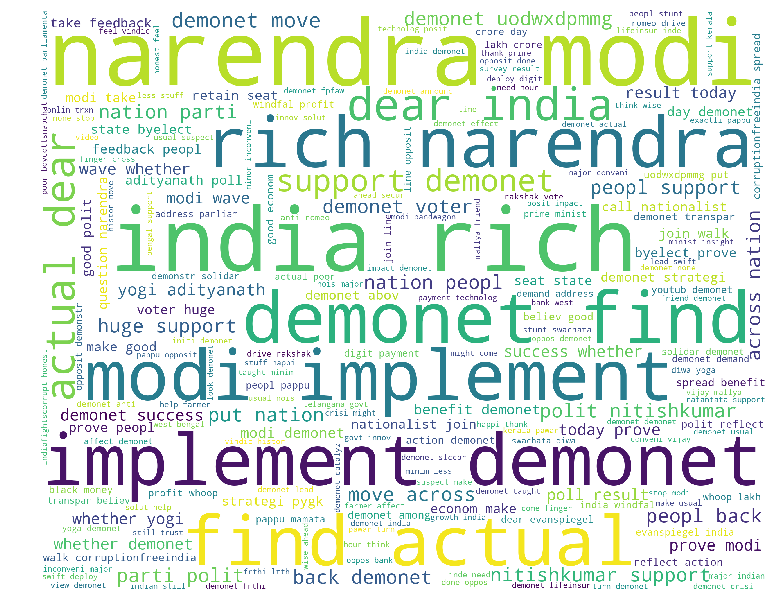

In [61]:
print('Positive words cloud')
draw_wordcloud(tweet_pos, 'white')

neutral words cloud


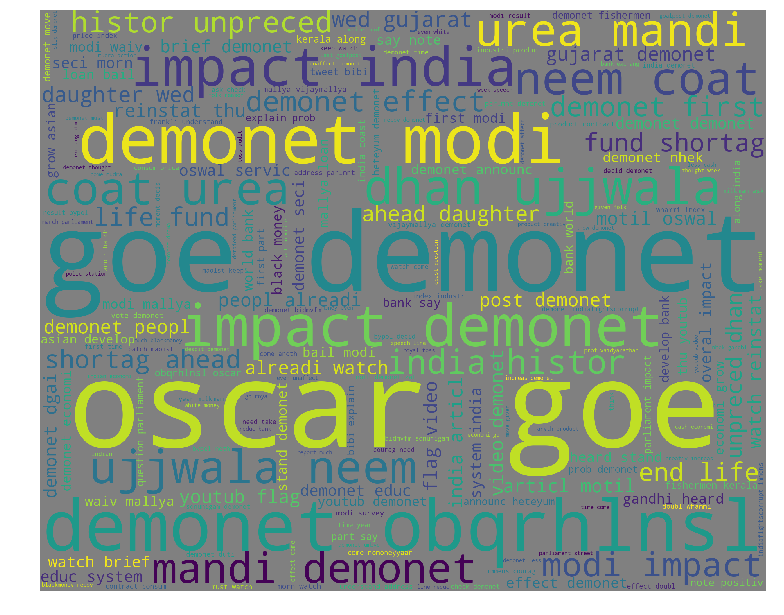

In [62]:
print('neutral words cloud')
draw_wordcloud(tweet_net, 'grey')

negative words cloud


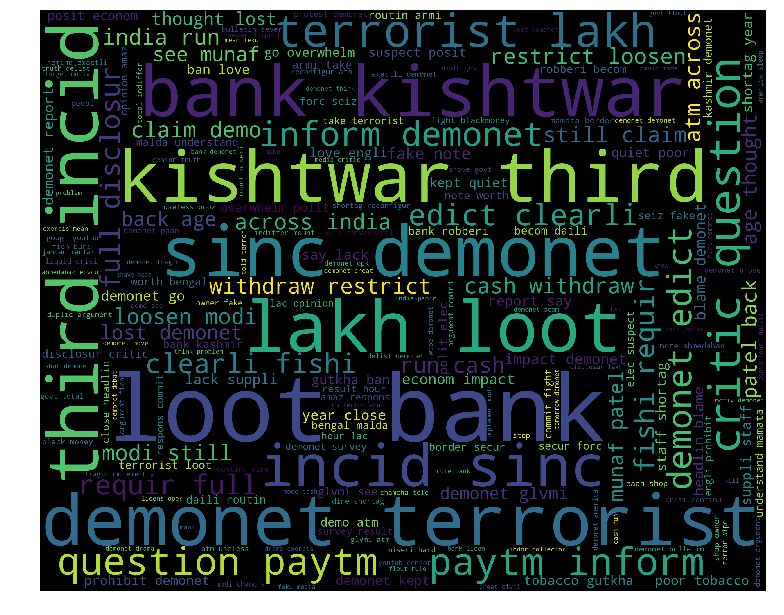

In [63]:
print('negative words cloud')
draw_wordcloud(tweet_neg, 'black')